# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

# 1. Datos y transformación.

In [1]:
# ============================================
# IMPORTACIÓN DE LIBRERÍAS
# ============================================

# Librerías para cálculo numérico y manipulación de datos
import numpy as np  # Operaciones con arrays y matrices
import pandas as pd  # Manipulación y análisis de datos tabulares
import matplotlib.pyplot as plt  # Visualización de gráficos
import seaborn as sns  # Visualización estadística avanzada

# Librerías para manejo de archivos y sistema operativo
import os  # Interacción con el sistema de archivos (rutas, directorios)
import cv2  # OpenCV para procesamiento de imágenes (redimensionado)
from skimage.io import imread  # Lectura de imágenes desde disco

# Librería de Deep Learning (TensorFlow/Keras)
from tensorflow import keras  # Framework para construir y entrenar redes neuronales

# Métricas para evaluación de modelos
from sklearn.metrics import confusion_matrix  # Matriz de confusión para clasificación

In [2]:
# ============================================
# DEFINICIÓN DE CLASES (ETIQUETAS)
# ============================================

# Lista con los nombres de las 6 categorías de paisajes a clasificar
class_names = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

# Diccionario que mapea cada nombre de clase a un número (0-5)
# Esto es necesario porque los modelos trabajan con números, no con textos
# Ejemplo: "buildings" -> 0, "forest" -> 1, etc.
class_names_d = {class_name:i for i, class_name in enumerate(class_names)}
class_names_d

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [3]:
os.getcwd()

'c:\\Users\\borja\\Desktop\\Bootcamp\\repo_alumnos\\2509_dsft_thebridge_valencia\\3-Machine_Leaning\\3-Deep_Learning\\2-ComputerVision\\1-Redes_Convolucionales\\ejercicio paisajes'

In [4]:
os.listdir(os.getcwd() + "\\paisajes\\seg_train") 

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [5]:
IMAGE_SIZE = (32,32) 

TRAIN_PATH = os.getcwd() + "\\paisajes\\seg_train" 
TEST_PATH = os.getcwd() + "\\paisajes\\seg_test" 

print(TRAIN_PATH)
print(TEST_PATH)

c:\Users\borja\Desktop\Bootcamp\repo_alumnos\2509_dsft_thebridge_valencia\3-Machine_Leaning\3-Deep_Learning\2-ComputerVision\1-Redes_Convolucionales\ejercicio paisajes\paisajes\seg_train
c:\Users\borja\Desktop\Bootcamp\repo_alumnos\2509_dsft_thebridge_valencia\3-Machine_Leaning\3-Deep_Learning\2-ComputerVision\1-Redes_Convolucionales\ejercicio paisajes\paisajes\seg_test


In [6]:
# ============================================
# FUNCIÓN PARA CARGAR Y PROCESAR IMÁGENES
# ============================================

def read_data_2(path, im_size, class_names_label):
    """
    Función que recorre carpetas de imágenes, las carga, redimensiona y etiqueta.
    
    Parámetros:
    - path: ruta al directorio principal con subcarpetas de clases
    - im_size: tupla con el tamaño deseado (ancho, alto)
    - class_names_label: diccionario que mapea nombres de carpetas a números
    
    Retorna:
    - X: array de numpy con todas las imágenes
    - y: array de numpy con las etiquetas correspondientes
    """
    
    # Listas para almacenar imágenes y etiquetas
    X = []  # Aquí guardaremos las imágenes procesadas
    y = []  # Aquí guardaremos las etiquetas numéricas
    
    # Iteramos sobre cada carpeta (cada carpeta es una clase)
    for folder in os.listdir(path):
        print("Recorriendo ", folder)  # Mostramos progreso
        
        # Obtenemos la etiqueta numérica de la clase actual
        label = class_names_label[folder]  # Ej: "buildings" -> 0
        
        # Construimos la ruta completa a la carpeta de la clase
        folder_path = os.path.join(path, folder)
        
        # Iteramos sobre cada archivo (imagen) dentro de la carpeta
        for file in os.listdir(folder_path):
            # Construimos la ruta completa a la imagen
            image_path = os.path.join(folder_path, file)
            
            try:
                # Intentamos leer la imagen desde disco
                image = imread(image_path)
                
                # Redimensionamos la imagen al tamaño especificado (32x32)
                # Esto normaliza todas las imágenes al mismo tamaño
                smallimage = cv2.resize(image, im_size)
                
                # Añadimos la imagen procesada a nuestra lista
                X.append(smallimage)
                
                # Añadimos la etiqueta correspondiente
                y.append(label)
                
            except Exception as e:
                # Si hay algún error al leer una imagen, lo mostramos
                print("Error en la lecura", image_path)
                print(e)
    
    # Convertimos las listas a arrays de numpy para usar con Keras
    return np.array(X), np.array(y)


In [7]:
X_train, y_train = read_data_2(TRAIN_PATH,IMAGE_SIZE,class_names_d)

Recorriendo  buildings
Recorriendo  forest
Recorriendo  glacier
Recorriendo  mountain
Recorriendo  sea
Recorriendo  street


In [8]:
X_test, y_test = read_data_2(TEST_PATH,IMAGE_SIZE,class_names_d)

Recorriendo  buildings
Recorriendo  forest
Recorriendo  glacier
Recorriendo  mountain
Recorriendo  sea
Recorriendo  street


In [9]:
# Mostramos las dimensiones de los arrays cargados
print(X_train.shape)  # (14034, 32, 32, 3) = 14034 imágenes de 32x32 píxeles con 3 canales RGB
print(X_test.shape)   # (3000, 32, 32, 3) = 3000 imágenes de test
print(y_train.shape)  # (14034,) = 14034 etiquetas de entrenamiento
print(y_test.shape)   # (3000,) = 3000 etiquetas de test

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


# 2. Analisis.

In [10]:
pd.Series(y_train).value_counts()

3    2512
2    2404
5    2382
4    2274
1    2271
0    2191
Name: count, dtype: int64

In [11]:
pd.Series(y_test).value_counts()

2    553
3    525
4    510
5    501
1    474
0    437
Name: count, dtype: int64

In [12]:
from sklearn.utils import shuffle 

X_train, y_train = shuffle(X_train, y_train, random_state=14)
X_test, y_test = shuffle(X_test, y_test, random_state=14)

sea


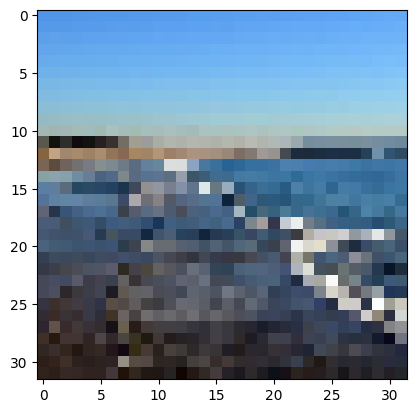

In [17]:
index = np.random.randint(X_train.shape[0])
print( class_names[y_train[index]])
plt.imshow(X_train[index])

In [18]:
X_train = X_train / 255
X_test = X_test / 255

# 3. MODELO.


In [19]:
modelo = keras.Sequential([
    keras.layers.Conv2D(64,(3,3),input_shape = (32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(32,(3,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(16,(3,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(), 
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(6, activation = "softmax"),
    
])

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,590 (107.77 KB)

 Trainable params: 27,590 (107.77 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = modelo.fit(
    X_train,
    y_train,
    
    batch_size= 128,
    epochs= 20, 
    validation_split=0.1
)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4413 - loss: 1.3794 - val_accuracy: 0.5883 - val_loss: 1.1581
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5949 - loss: 1.0628 - val_accuracy: 0.6189 - val_loss: 1.0205
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6416 - loss: 0.9438 - val_accuracy: 0.6182 - val_loss: 0.9902
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6658 - loss: 0.8841 - val_accuracy: 0.6717 - val_loss: 0.8851
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6829 - loss: 0.8395 - val_accuracy: 0.6688 - val_loss: 0.8667
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6983 - loss: 0.8095 - val_accuracy: 0.6902 - val_loss: 0.8347
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7162 - loss: 0.7712 - val_accuracy: 0.7115 - val_loss: 0.8104
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7201 - loss: 0.7607 - val_accuracy: 0.7123 - v

In [24]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,21))

In [25]:
df_hist

,accuracy,loss,val_accuracy,val_loss
1,0.441251,1.379443,0.588319,1.158092
2,0.594854,1.062773,0.618946,1.020461
3,0.641647,0.943751,0.618234,0.990202
4,0.665796,0.884135,0.671652,0.885078
5,0.682898,0.839542,0.668803,0.866705
6,0.698258,0.809547,0.690171,0.834722
7,0.716152,0.771228,0.711538,0.810446
8,0.720111,0.760718,0.712251,0.792164
9,0.727237,0.727726,0.716524,0.776087
10,0.735392,0.716218,0.702991,0.801718


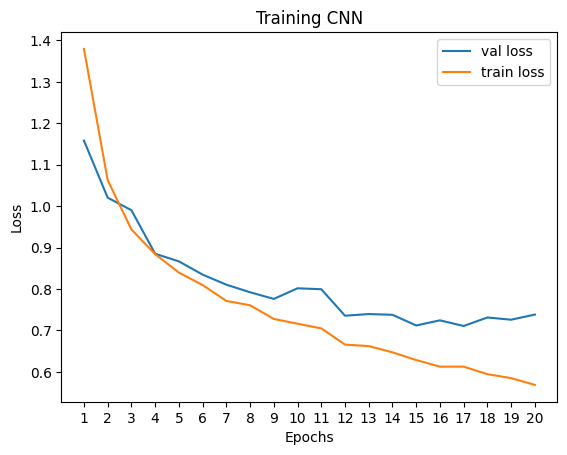

In [26]:
plt.plot(df_hist['val_loss'], label="val loss")  # Pérdida en validación
plt.plot(df_hist['loss'], label="train loss")    # Pérdida en entrenamiento
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(1,21))  # Marcas en el eje X para cada epoch
plt.legend()

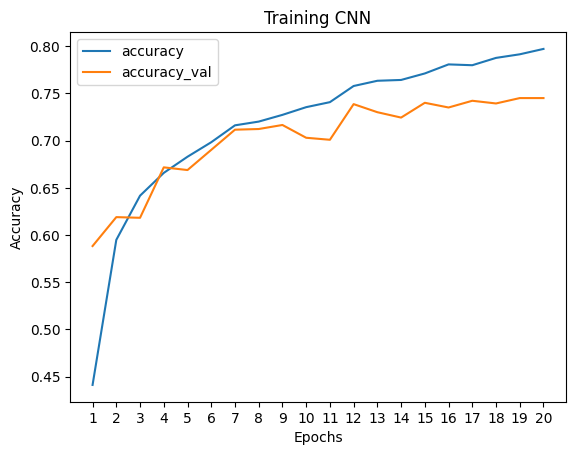

In [27]:
plt.plot(df_hist['accuracy'], label="accuracy")          # Precisión en train
plt.plot(df_hist['val_accuracy'], label="accuracy_val")  # Precisión en validación
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,21))  # Marcas en el eje X para cada epoch
plt.legend()

In [28]:
y_pred = modelo.predict(X_test) 

y_pred.round(2)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.97, 0.  , 0.  , 0.  , 0.01],
       [0.12, 0.  , 0.  , 0.  , 0.01, 0.86],
       ...,
       [0.  , 0.  , 0.98, 0.01, 0.01, 0.  ],
       [0.  , 0.  , 0.96, 0.02, 0.02, 0.  ],
       [0.06, 0.01, 0.  , 0.  , 0.  , 0.94]],
      shape=(3000, 6), dtype=float32)

street
[1.2132199e-01 1.3992385e-03 3.7692746e-03 4.2264609e-04 9.8584266e-03
 8.6322856e-01]


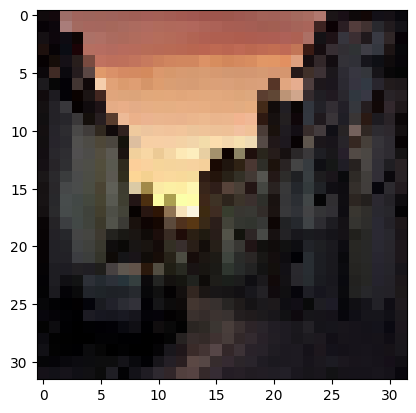

In [ ]:
print(class_names[y_test[2]])

print(y_pred[2])

plt.imshow(X_test[2])

In [ ]:
# Importamos Keras y los callbacks necesarios
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

# =============================================
#   DEFINICIÓN DEL MODELO (Red Convolucional)
# =============================================

# Creamos un modelo secuencial (capas una tras otra)
modelo = keras.Sequential([

    # Primera capa convolucional con 64 filtros y tamaño de kernel 3x3
    # input_shape = tamaño de las imágenes (32x32 con 3 canales RGB)
    keras.layers.Conv2D(64, (3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),  # Reduce dimensiones y evita overfitting

    # Segunda capa convolucional + pooling
    keras.layers.Conv2D(32, (3,3)),
    keras.layers.MaxPooling2D(2,2),

    # Tercera capa convolucional + pooling
    keras.layers.Conv2D(16, (3,3)),
    keras.layers.MaxPooling2D(2,2),

    # Aplanamos la salida para conectar con capas densas
    keras.layers.Flatten(),

    # Primera capa densa (fully connected)
    keras.layers.Dense(32, activation="relu"),

    # Segunda capa densa
    keras.layers.Dense(16, activation="relu"),

    # Capa de salida: 6 clases → activación softmax
    keras.layers.Dense(6, activation="softmax"),
])

# =============================================
#        COMPILACIÓN DEL MODELO
# =============================================

modelo.compile(
    optimizer='adam',                     # Optimizador Adam
    loss='sparse_categorical_crossentropy',  # Para clasificación con etiquetas enteras
    metrics=['accuracy']                  # Métrica para evaluar rendimiento
)

# =============================================
#                  CALLBACKS
# =============================================

# EARLY STOPPING:
# Detiene el entrenamiento si la pérdida de validación
# no mejora tras 5 épocas y restaura los mejores pesos.
early_stop = EarlyStopping(
    monitor='val_loss',      # Se observa la pérdida de validación
    patience=5,              # Número de épocas sin mejora permitidas
    restore_best_weights=True
)

# MODEL CHECKPOINT:
# Guarda el modelo completo (.h5) al final de cada época.
checkpoint = ModelCheckpoint(
    filepath='model_epoch_{epoch:02d}.keras',  # Se generarán archivos: model_epoch_01.h5, etc.
    save_best_only=False,                   # Guardamos *todas* las épocas si no pon True
    save_weights_only=False,                # Guardar modelo completo, no solo pesos
    monitor='val_loss'                      # Se usa como referencia
)

# =============================================
#           ENTRENAMIENTO DEL MODELO
# =============================================

history = modelo.fit(
    X_train,        # Datos de entrenamiento
    y_train,        # Etiquetas de entrenamiento
    batch_size=128, # Procesa 128 imágenes por lote
    epochs=20,      # Máximo de 20 épocas
    validation_split=0.1,     # 10% del dataset se usa como validación
    callbacks=[early_stop, checkpoint]   # Activamos EarlyStopping + Checkpoint
)
